Data shapes:
X shape: (2, 200)
Y shape: (1, 200)


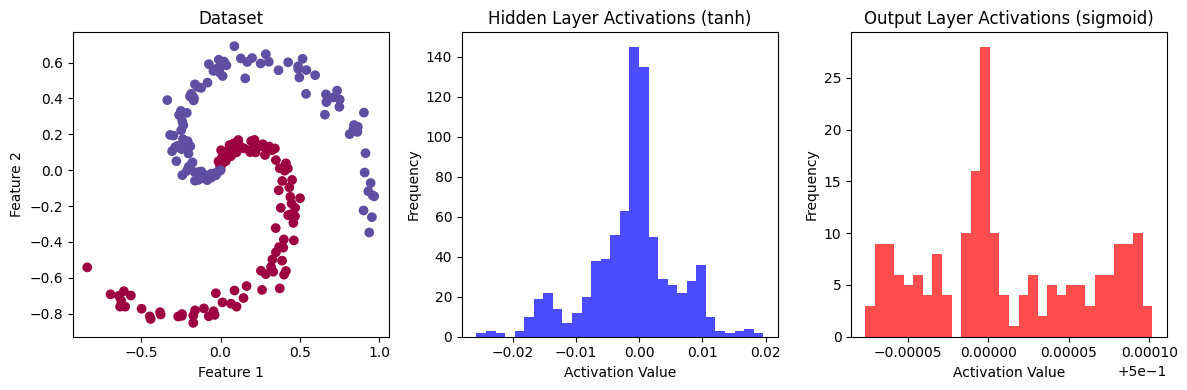

Network Architecture:
------------------------------
Input Layer: 2 neurons
Hidden Layer: 4 neurons (tanh activation)
Output Layer: 1 neuron (sigmoid activation)
------------------------------
Shapes of Parameters:
W1: (4, 2)
b1: (4, 1)
W2: (1, 4)
b2: (1, 1)
------------------------------
Activations:
Hidden Layer (A1): (4, 200)
Output Layer (A2): (1, 200)
------------------------------
First 3 hidden layer activations:
[[ 0.00000000e+00 -2.21859212e-06 -9.27353705e-06]
 [ 0.00000000e+00  1.82790494e-04  3.41978508e-04]
 [ 0.00000000e+00 -6.99111076e-05 -1.61003682e-04]
 [ 0.00000000e+00 -1.29522503e-04 -2.54017718e-04]]
First 3 output layer activations:
[[0.5        0.49999875 0.49999757]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data (spiral dataset)
def generate_data():
    np.random.seed(1)
    N = 100  # number of points per class
    D = 2    # dimensionality
    K = 2    # number of classes
    X = np.zeros((N*K, D))  # data matrix (each row = single example)
    Y = np.zeros((N*K, 1), dtype='uint8')  # class labels

    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    return X.T, Y.T

# Generate and plot the data
X, Y = generate_data()
print("Data shapes:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.parameters = self.initialize_parameters(input_size, hidden_size, output_size)
        self.cache = {}

    def initialize_parameters(self, n_x, n_h, n_y):
        np.random.seed(2)
        W1 = np.random.randn(n_h, n_x) * 0.01
        b1 = np.zeros((n_h, 1))
        W2 = np.random.randn(n_y, n_h) * 0.01
        b2 = np.zeros((n_y, 1))
        parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
        return parameters

    def forward_propagation(self, X):
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]

        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = 1 / (1 + np.exp(-Z2))

        self.cache = {"A1": A1, "A2": A2}
        return A2

# Create and test the neural network
nn = NeuralNetwork(input_size=X.shape[0], hidden_size=4, output_size=1)
output = nn.forward_propagation(X)

# Plot the data and network structure
# Plot 1: Dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.Spectral)
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot 2: Hidden Layer Activations
plt.subplot(1, 3, 2)
plt.hist(nn.cache['A1'].flatten(), bins=30, color='blue', alpha=0.7)
plt.title("Hidden Layer Activations (tanh)")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")

# Plot 3: Output Layer Activations
plt.subplot(1, 3, 3)
plt.hist(output.flatten(), bins=30, color='red', alpha=0.7)
plt.title("Output Layer Activations (sigmoid)")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Print network architecture and shapes
print("Network Architecture:")
print("-" * 30)
print(f"Input Layer: {X.shape[0]} neurons")
print(f"Hidden Layer: {nn.parameters['W1'].shape[0]} neurons (tanh activation)")
print(f"Output Layer: {nn.parameters['W2'].shape[0]} neuron (sigmoid activation)")
print("-" * 30)
print("Shapes of Parameters:")
print("W1:", nn.parameters["W1"].shape)
print("b1:", nn.parameters["b1"].shape)
print("W2:", nn.parameters["W2"].shape)
print("b2:", nn.parameters["b2"].shape)
print("-" * 30)
print("Activations:")
print("Hidden Layer (A1):", nn.cache["A1"].shape)
print("Output Layer (A2):", output.shape)
print("-" * 30)
print("First 3 hidden layer activations:")
print(nn.cache["A1"][:, :3])
print("First 3 output layer activations:")
print(output[:, :3])
